<a href="https://colab.research.google.com/github/Tiwari666/Autoencoders_Generative_AI/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('/content/autoencoder.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
df.shape

(284807, 31)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

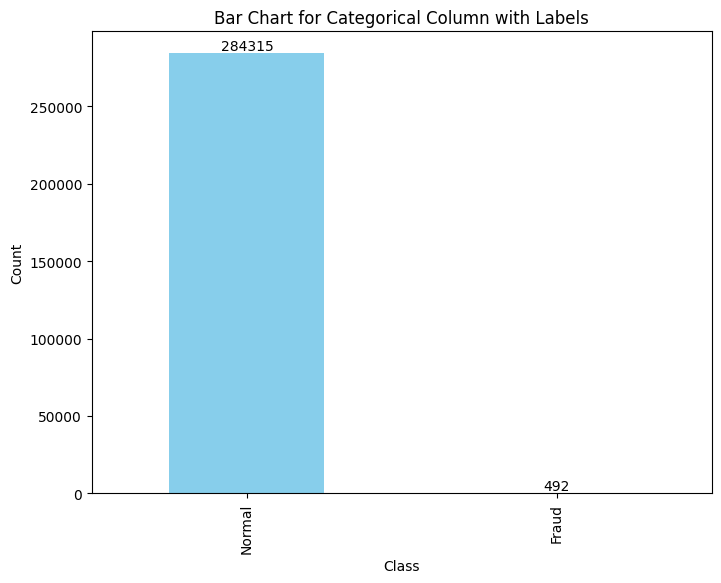

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'Class' is the name of your categorical column
# Assigning 0 to 'Non-fraud' and 1 to 'Fraud'
df['Class'] = df['Class'].replace({'Non-fraud': 0, 'Fraud': 1})

plt.figure(figsize=(8, 6))
counts = df['Class'].value_counts()
counts.plot(kind='bar', color='skyblue')

# Adding labels to the bars
for i, count in enumerate(counts):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Bar Chart for Categorical Column with Labels')
plt.xticks([0, 1], ['Normal', 'Fraud'])  # Adjust x-axis tick labels
plt.show()


The above bar chart shows the highly imbalanced dataset.

# **Creating two datframes for frauds and normal sub-class**

In [ ]:
fraud_df = df[df.Class == 1]
normal_df = df[df.Class == 0]

In [ ]:
fraud_df.shape

(492, 31)

In [ ]:
normal_df.shape

(284315, 31)

# **Statistical summary of the 'Amount' column for the fraud transactions:**

In [ ]:
fraud_df.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

# **Statistical summary of the 'Amount' column for the normal transactions:**

In [ ]:
normal_df.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# **Comparing the distributions between the two classes: fraud and normal transactions:**

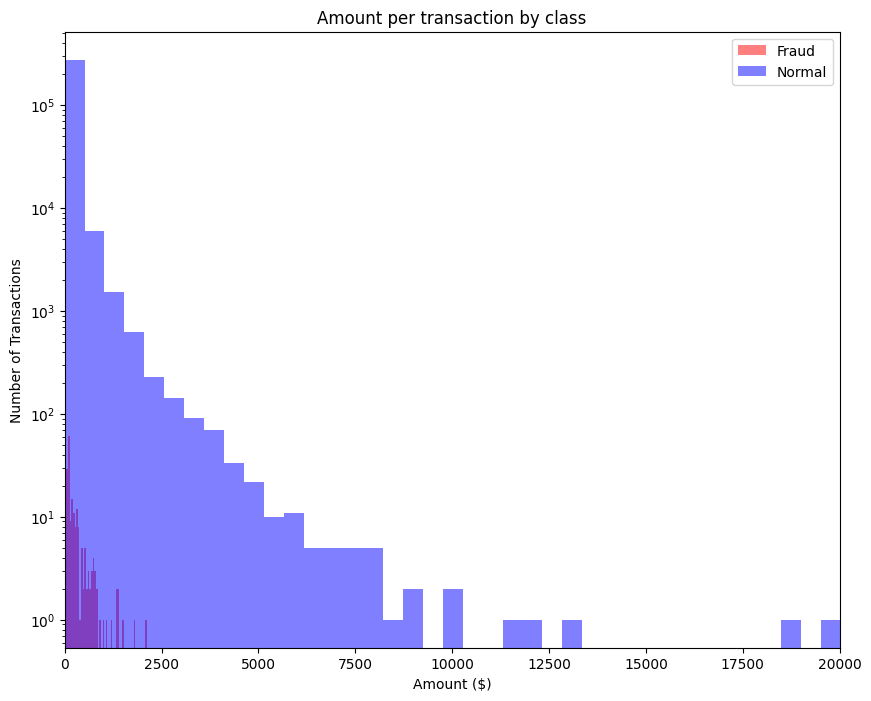

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))

plt.hist(fraud_df.Amount, bins=50, color='red', alpha=0.5, label='Fraud')
plt.hist(normal_df.Amount, bins=50, color='blue', alpha=0.5, label='Normal')

plt.title('Amount per transaction by class')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')

plt.legend()
plt.show()

# **Scatter plot:**

 It shows the relationship between the time of transaction and the transaction amount for both fraudulent and normal transactions.

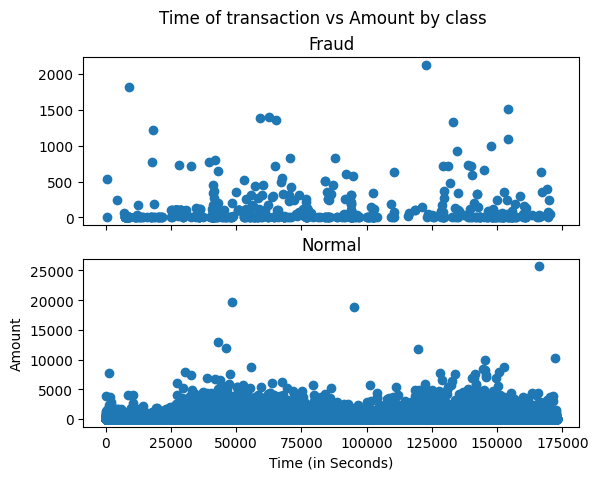

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')

ax1.scatter(fraud_df['Time'], fraud_df['Amount'])
ax1.set_title('Fraud')

ax2.scatter(normal_df['Time'], normal_df['Amount'])
ax2.set_title('Normal')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()


There doesn't seem to be a clear pattern in terms of time of day for either fraud or normal transactions based on the provided plot. However, further analysis may reveal patterns or anomalies in transaction times that could be indicative of fraudulent activity.

Let's build the autoencoder model.

# **Why autoencoder algorithm?**

A) Data Imbalance:

Fraudulent transactions are often rare compared to legitimate transactions, leading to imbalanced datasets where the majority class (legitimate transactions) heavily outweighs the minority class (fraudulent transactions).

Generative AI techniques, such as autoencoders, can help address imbalanced data by generating synthetic fraudulent samples, thereby balancing the dataset and improving the model's ability to detect fraudulent activity.

B) Anomaly Detection:

Autoencoders can be used for anomaly detection, where they learn to reconstruct normal instances accurately and identify instances that deviate significantly during reconstruction as anomalies (potentially fraudulent transactions).

Since fraudulent transactions often exhibit anomalous behavior compared to normal transactions, autoencoders can effectively capture such anomalies without the need for explicit labels.

C) Dimensionality Reduction:

Autoencoders inherently perform dimensionality reduction by learning a compressed representation (latent space) of the input data, minimizing the reconstruction error.

In fraud detection tasks with high-dimensional data, autoencoders can help in capturing essential information for fraud detection while minimizing noise and irrelevant features, leading to improved model performance.

 one of the primary objectives of an autoencoder is indeed to reduce the representation error, which is typically measured as the difference between the original input data and the reconstructed output data.

 The process of reducing the representation error involves optimizing the parameters of the autoencoder model, including the weights and biases of the encoder and decoder networks, through a training process. During training, the autoencoder minimizes a reconstruction loss function, such as mean squared error (MSE) or binary cross-entropy, which quantifies the discrepancy between the original input data and the reconstructed output data.

In summary, generative AI approaches with autoencoders can be advantageous for fraudulent activity detection, especially in scenarios with imbalanced datasets, limited labeled data, and the need for unsupervised learning. Autoencoders offer benefits such as data augmentation, anomaly detection, dimensionality reduction, and robustness to adversarial attacks, making them a viable option for fraud detection tasks.





# **Data Preprocessing for Modelling:**
 Dropping the Time column and scaling 'Amount' column using the scikit's StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

df = df.drop(['Time'], axis=1)

df['Amount'] = StandardScaler().fit_transform(df['Amount'].values.reshape(-1, 1))

# **Splitting the data into the train, validation and test set:**

In [ ]:
from sklearn.model_selection import train_test_split

# Splitting data into train, validation, and test sets
X_train, X_test = train_test_split(df, test_size=0.2, random_state=1)

# Further split training data into train and validation sets
X_train, X_val = train_test_split(X_train, test_size=0.25, random_state=1)  # 0.25 x 0.8 = 0.2

# Preprocessing for training data
X_train = X_train[X_train.Class == 0]
X_train = X_train.drop(['Class'], axis=1)
X_train = X_train

# Preprocessing for validation data
X_val = X_val[X_val.Class == 0]
X_val = X_val.drop(['Class'], axis=1)
X_val = X_val

# Preprocessing for test data
y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)
X_test = X_test

In [ ]:
X_train.shape

(170575, 29)

# **Epoch, iteration,  Batch_size:**

Training of entire dataset = one epoch

Training of one batch size dataset = one iteration

No of data chosen for training in one time = Batch_size



Example:

Total number of samples in the dataset/one epoch=3200,Batch size= 32 and epoch=20.
-->

Iterations in 1 epoch=3200/32 = 100

Total iterations in 20 epochs= 100 *20 = 2000

# **BUILDING THE AUTOENCODER MODEL:**

There should be X_train for both the input and the target variable while trainning the autoencoder model, indicating that the model is trained to reconstruct the input itself.

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
import tensorflow.keras as keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard

In [ ]:
# Define autoencoder model
input_dim = X_train.shape[1]  # Number of features
encoding_dim = 14  # Choose an encoding dimension

#Simailar to Input layer
input_layer = Input(shape=(input_dim, ))

encoder = Dense(encoding_dim, activation="tanh",
                activity_regularizer=regularizers.l1(10e-5))(input_layer)
#Simailar to Hidden layer
encoder = Dense(int(encoding_dim / 2), activation="relu")(encoder)

decoder = Dense(int(encoding_dim / 2), activation='tanh')(encoder)

#Simailar to output layer
decoder = Dense(input_dim, activation='relu')(decoder) # Here, "relu" gives better accuracy than "sigmoid" activation.

# Define the autoencoder model
autoencoder = Model(inputs=input_layer, outputs=decoder)

In [ ]:
# Compile the model
autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

# Set up callbacks: SAVE/CHECKPOINT THE MODEL TO LOAD/CALL BACK LATER.

# tensorboard: LOG AND VISUALIZE THE TRAINING METRICS: LOSS, ACCURACY, F1, PRECISION, RECALL
checkpointer = ModelCheckpoint(filepath="model.h5", verbose=0, save_best_only=True)
tensorboard = TensorBoard(log_dir='./logs', histogram_freq=0, write_graph=True, write_images=True)

# Train the model
history = autoencoder.fit(X_train, X_train, epochs=20, batch_size=32, shuffle=True,
                          validation_data=(X_test, X_test), verbose=1,
                          callbacks=[checkpointer, tensorboard])

# Evaluate the model on test data
test_loss = autoencoder.evaluate(X_test, X_test)
print(f"Test Loss: {test_loss}")

Epoch 1/20
5331/5331 [==============================] - 13s 2ms/step - loss: 0.8346 - accuracy: 0.5405 - val_loss: 0.8148 - val_accuracy: 0.6305
Epoch 2/20
 102/5331 [..............................] - ETA: 7s - loss: 0.7395 - accuracy: 0.6354

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


5331/5331 [==============================] - 11s 2ms/step - loss: 0.7676 - accuracy: 0.6405 - val_loss: 0.7882 - val_accuracy: 0.6546
Epoch 3/20
5331/5331 [==============================] - 11s 2ms/step - loss: 0.7498 - accuracy: 0.6636 - val_loss: 0.7762 - val_accuracy: 0.6685
Epoch 4/20
5331/5331 [==============================] - 11s 2ms/step - loss: 0.7401 - accuracy: 0.6789 - val_loss: 0.7703 - val_accuracy: 0.6850
Epoch 5/20
5331/5331 [==============================] - 10s 2ms/step - loss: 0.7348 - accuracy: 0.6858 - val_loss: 0.7652 - val_accuracy: 0.6904
Epoch 6/20
5331/5331 [==============================] - 10s 2ms/step - loss: 0.7317 - accuracy: 0.6913 - val_loss: 0.7628 - val_accuracy: 0.6979
Epoch 7/20
5331/5331 [==============================] - 11s 2ms/step - loss: 0.7305 - accuracy: 0.6943 - val_loss: 0.7620 - val_accuracy: 0.6848
Epoch 8/20
5331/5331 [==============================] - 10s 2ms/step - loss: 0.7290 - accuracy: 0.6965 - val_loss: 0.7606 - val_accuracy: 0.6

# **Visualization of Evaluation of training and validation loss:**

It plots the training and validation loss over epochs during the training of a model.

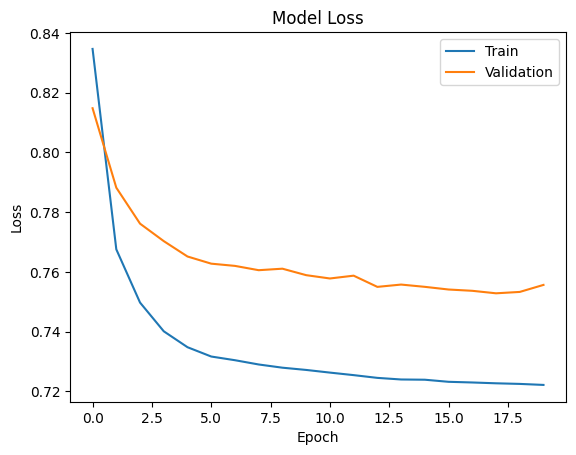

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

The reconstruction error for both our training and test data appears to converge smoothly. Is the error sufficiently low? Let's examine the distribution of the error more closely.

**Getting reconstructed outputs generated by the autoencoder model**

In [ ]:
from tensorflow.keras.models import load_model

autoencoder = load_model('model.h5')

In [ ]:
predictions = autoencoder.predict(X_test)
predictions

1781/1781 [==============================] - 3s 2ms/step


array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.187502  , 1.1564468 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.8985592 , 0.85284543, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 1.3770103 , ..., 0.        , 0.        ,
        0.        ],
       [0.8386916 , 0.        , 0.9345782 , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00723159, 0.        ,
        0.        ]], dtype=float32)

**Comparing the mean squared error (MSE) between the original test data X_test and the reconstructed predictions generated by the autoencoder model.**

In [ ]:
mse = np.mean(np.power(X_test - predictions, 2), axis=1)
error_df = pd.DataFrame({'reconstruction_error': mse,
                        'true_class': y_test})
error_df.describe()

,reconstruction_error,true_class
count,56962.000000,56962.000000
mean,0.751990,0.001527
std,3.898084,0.039052
min,0.038617,0.000000
25%,0.239246,0.000000
50%,0.381322,0.000000
75%,0.616542,0.000000
max,501.058264,1.000000


# **Reconstruction error without fraud**

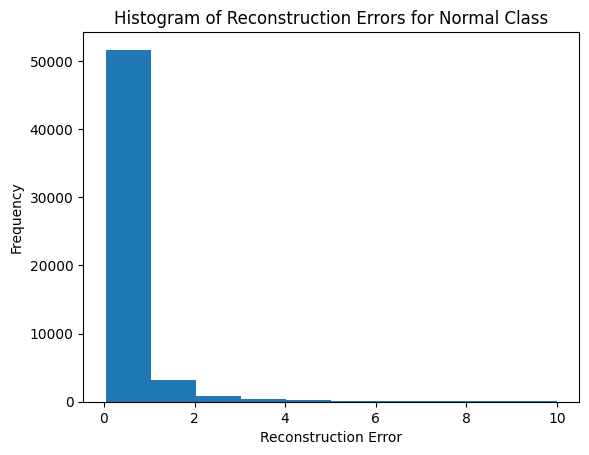

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Filter out the normal class with reconstruction errors less than 10
normal_error_df = error_df[(error_df['true_class'] == 0) & (error_df['reconstruction_error'] < 10)]

# Plot histogram
_ = ax.hist(normal_error_df.reconstruction_error.values, bins=10)

# Add labels and title
ax.set_xlabel('Reconstruction Error')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Reconstruction Errors for Normal Class')

plt.show()

The above graph shows the distribution of reconstruction errors for normal instances and gain insights into how well the autoencoder model is reconstructing normal data. Lower reconstruction errors indicate better performance of the autoencoder in reconstructing normal instances, while higher errors may indicate anomalies or instances where the model struggles to reconstruct accurately.

# **Reconstruction error with fraud**

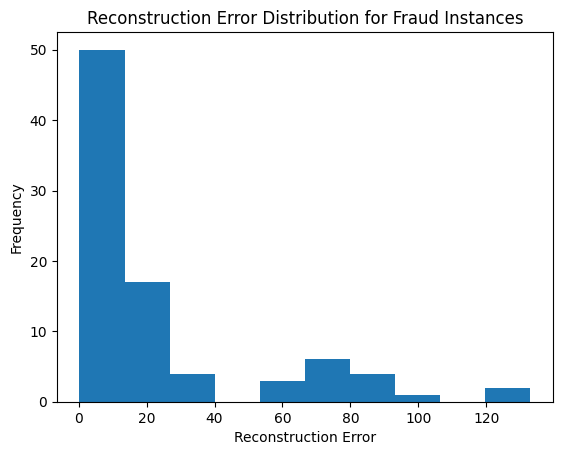

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)

# Filter the error dataframe for instances labeled as fraud
fraud_error_df = error_df[error_df['true_class'] == 1]

# Create the histogram
_ = ax.hist(fraud_error_df.reconstruction_error.values, bins=10)

# Add labels and title
ax.set_title('Reconstruction Error Distribution for Fraud Instances')
ax.set_xlabel('Reconstruction Error')
ax.set_ylabel('Frequency')

# Show the plot
plt.show()


# **Evaluation of the performance of autoencoder classification models:**

Our data being Imbalanced Data, let's see the ROC curve.

In [ ]:
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc,
                             roc_curve, recall_score, classification_report, f1_score,
                             precision_recall_fscore_support)

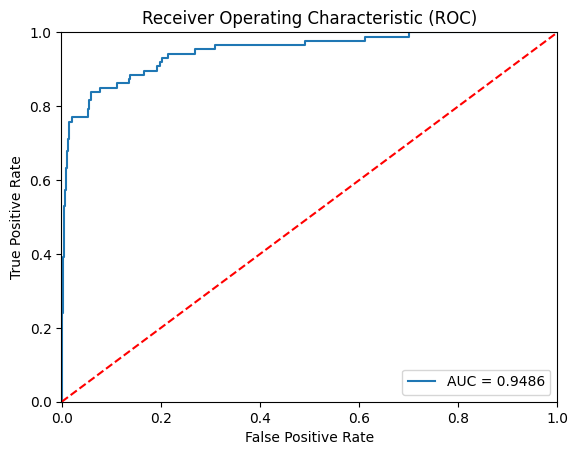

In [ ]:
fpr, tpr, thresholds = roc_curve(error_df.true_class, error_df.reconstruction_error)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic (ROC)')
plt.plot(fpr, tpr, label='AUC = %0.4f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([-0.001, 1])
plt.ylim([0, 1.001])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

The red dashed line in the Receiver Operating Characteristic (ROC) curve is random guessing,False Positive = True Positve.

When evaluating a fraud detection model, we aim to minimize false positives (FP) while maximizing true positives (TP).


In our case, the AOC curve residing at the top-left corner and the farther away from the red dashed line indicates the better the performance of the autoencoder classification model.


# **Precision vs Recall**

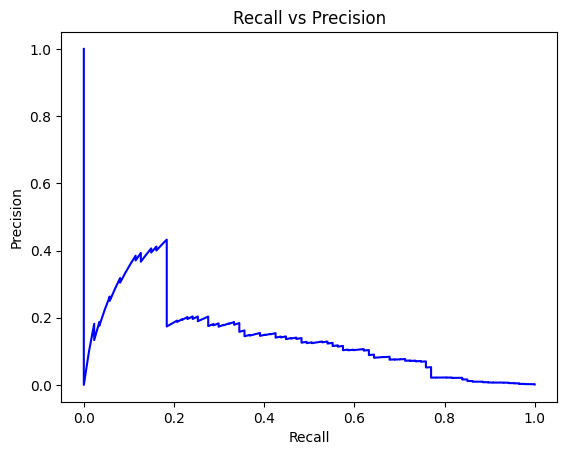

In [ ]:
precision, recall, thresholds = precision_recall_curve(error_df.true_class, error_df.reconstruction_error)
plt.plot(recall, precision, 'b', label='Precision-Recall curve')
plt.title('Recall vs Precision')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

A higher precision indicates fewer false positives (normal transactions incorrectly classified as fraudulent), while a lower precision means more false positives.

precision = tp / (tp + fp)

A higher recall indicates that more actual fraudulent transactions are correctly identified as fraudulent, while a lower recall means that some fraudulent transactions are missed (false negatives).

recall = tp / (tp + fn)

The goal is to achieve a high precision and high recall simultaneously, indicating accurate and comprehensive detection of fraudulent transactions.


Interpretation:

A high area under the curve represents both high recall and high precision, where high precision relates to a low false positive rate, and high recall relates to a low false negative rate. High scores for both show that the classifier is returning accurate results (high precision), as well as returning a majority of all positive results (high recall).

# **Precision against different Threshold values:**

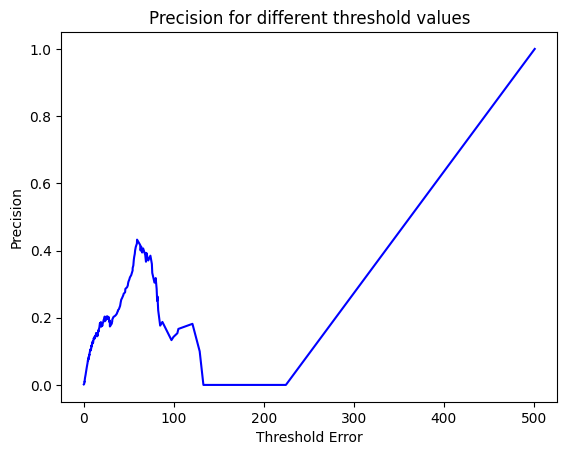

In [ ]:
plt.plot(thresholds, precision[1:], 'b', label='Threshold-Precision curve')
plt.title('Precision for different threshold values')
plt.xlabel('Threshold Error')
plt.ylabel('Precision')
plt.show()

The Precision graph shows that as the reconstruction error increases, our precision also rises.

# **Recall against different Threshold values:**

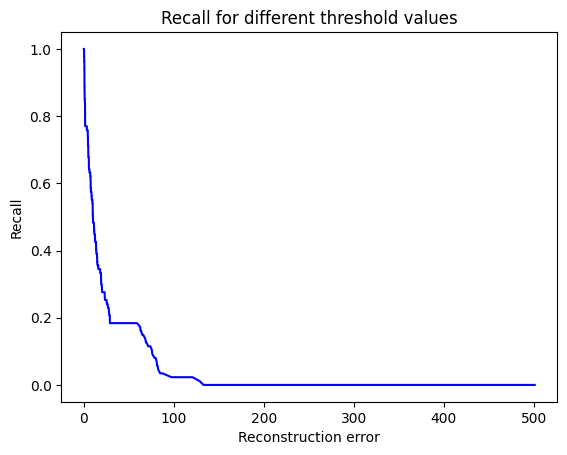

In [ ]:
plt.plot(thresholds, recall[1:], 'b', label='Threshold-Recall curve')
plt.title('Recall for different threshold values')
plt.xlabel('Reconstruction error')
plt.ylabel('Recall')
plt.show()

As the reconstruction error increases, the recall decreases--not a good result for correctly identify positive instances.

A decrease in recall as reconstruction error increases means that the model is missing more positive instances (i.e., failing to detect them) as the reconstruction error threshold becomes more lenient. This indicates that the model's ability to correctly identify positive instances is decreasing, which is usually undesirable, especially in applications where detecting positive instances is crucial, such as fraud detection or anomaly detection.

# **Checking Reconstruction Error:**

In [ ]:
threshold_value = 2.9

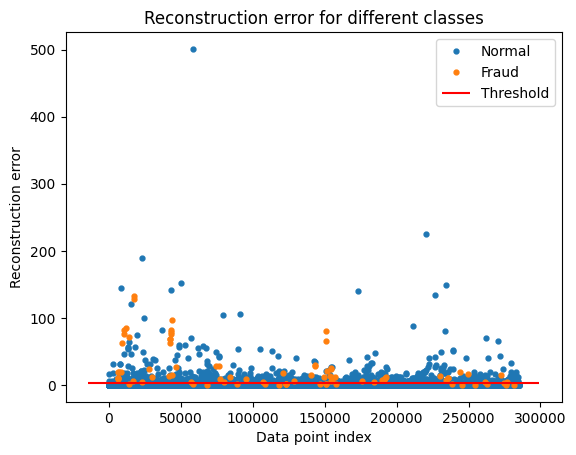

In [ ]:
groups = error_df.groupby('true_class')
fig, ax = plt.subplots()

for name, group in groups:
    ax.plot(group.index, group.reconstruction_error, marker='o', ms=3.5, linestyle='',
            label= "Fraud" if name == 1 else "Normal")
ax.hlines(threshold_value, ax.get_xlim()[0], ax.get_xlim()[1], colors="r", zorder=100, label='Threshold')
ax.legend()
plt.title("Reconstruction error for different classes")
plt.ylabel("Reconstruction error")
plt.xlabel("Data point index")
plt.show();

# **Let's check the Confusion Matrix:**

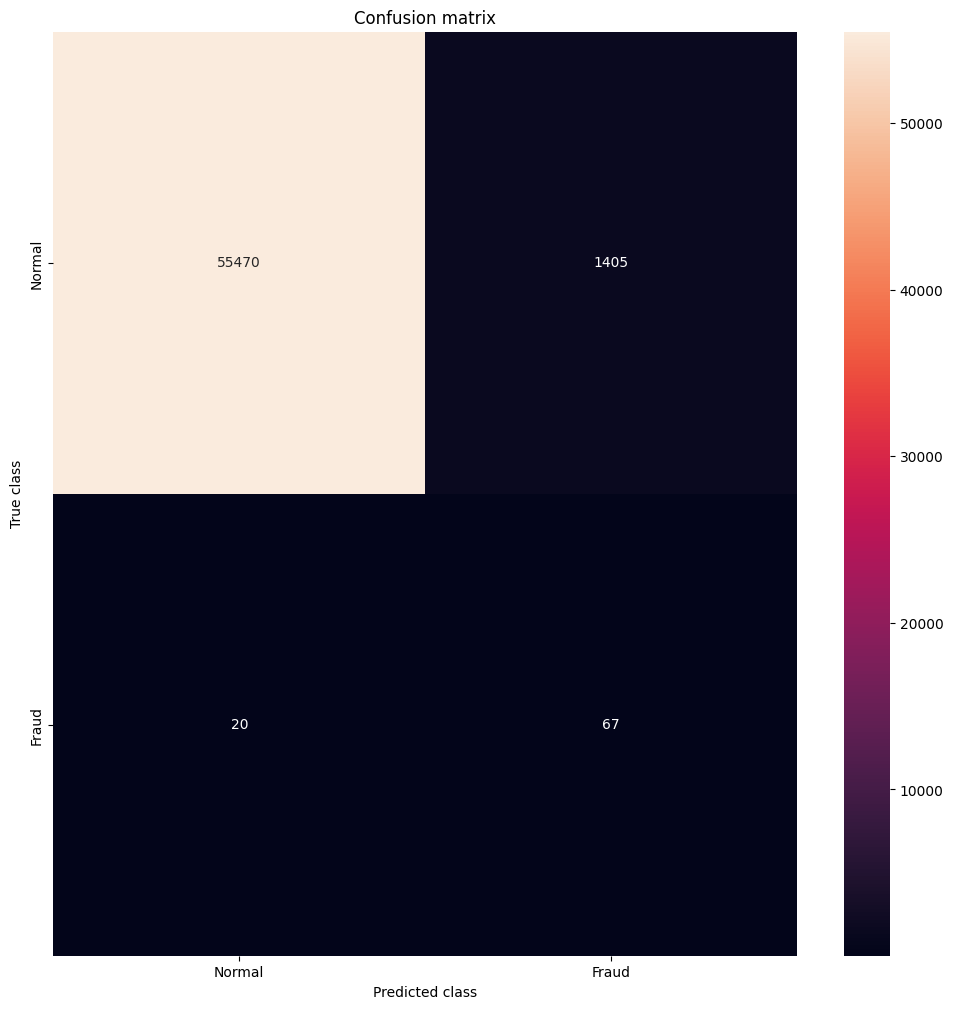

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate predicted classes based on reconstruction error and threshold
y_pred = [1 if e > threshold_value else 0 for e in error_df.reconstruction_error.values]

# Compute confusion matrix
conf_matrix = confusion_matrix(error_df.true_class, y_pred)

# Define class labels
LABELS = ["Normal", "Fraud"]

# Plot confusion matrix
plt.figure(figsize=(12, 12))
sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d")
plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel("Predicted class")
plt.show()